In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target


In [2]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
target *= 100
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

In [6]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(data, target)

DecisionTreeRegressor(random_state=42)

In [7]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data)
score = mean_absolute_error(target, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 0.00 k$


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [10]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error

target_predicted = regressor.predict(X_test)
score = mean_absolute_error(y_test, target_predicted)
print(f"On average, our regressor makes an error of {score:.2f} k$")

On average, our regressor makes an error of 46.33 k$


In [39]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=40, test_size=0.3, random_state=42)
results = cross_validate(regressor, data, target, cv=cv, scoring = "neg_mean_absolute_percentage_error")

In [40]:
import pandas as pd

cv_results = pd.DataFrame(results)
cv_results.head()

,fit_time,score_time,test_score
0,0.282610,0.005599,-0.262721
1,0.272338,0.004176,-0.255744
2,0.278471,0.005001,-0.255157
3,0.308994,0.006008,-0.253561
4,0.281945,0.005004,-0.256909


In [41]:
cv_results["test_error"] = -cv_results["test_score"]
cv_results.head(10)

,fit_time,score_time,test_score,test_error
0,0.282610,0.005599,-0.262721,0.262721
1,0.272338,0.004176,-0.255744,0.255744
2,0.278471,0.005001,-0.255157,0.255157
3,0.308994,0.006008,-0.253561,0.253561
4,0.281945,0.005004,-0.256909,0.256909
5,0.288540,0.005002,-0.249960,0.249960
6,0.291365,0.006997,-0.265356,0.265356
7,0.315143,0.004000,-0.249448,0.249448
8,0.293789,0.004000,-0.252361,0.252361
9,0.310295,0.004072,-0.253614,0.253614


In [42]:
len(cv_results)

40

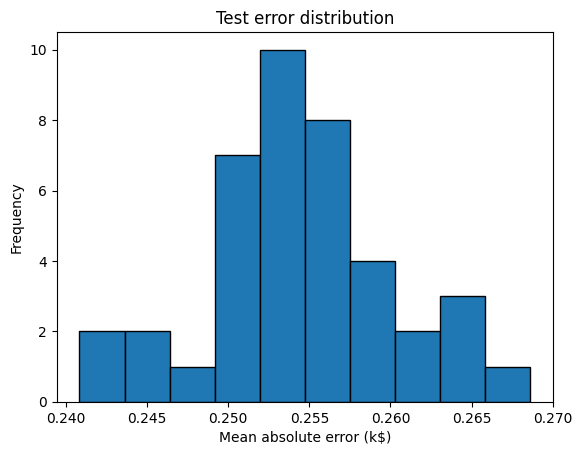

In [43]:
import matplotlib.pyplot as plt

cv_results["test_error"].plot.hist(bins=10, edgecolor="black")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Test error distribution")

In [44]:
print(
    "The mean cross-validated testing error is: "
    f"{cv_results['test_error'].mean():.2f} k$"

)

The mean cross-validated testing error is: 0.25 k$


In [45]:
print("The standard deviation of the testing error is: "
      f"{cv_results['test_error'].std():.2f}")

The standard deviation of the testing error is: 0.01


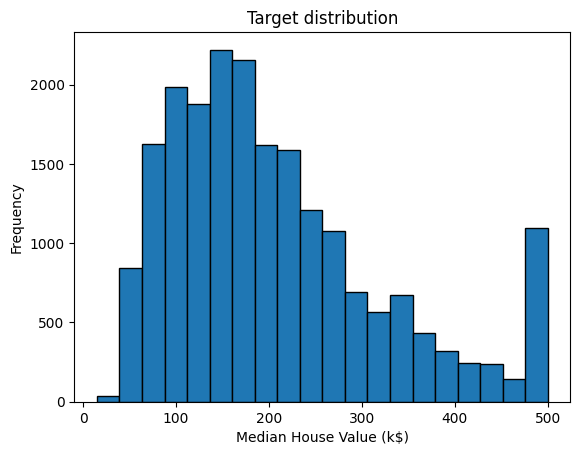

In [46]:
target.plot.hist(bins=20, edgecolor = "black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

In [47]:
print(f"The standard deviation of the target is: {target.std():.2f} k$")

The standard deviation of the target is: 115.40 k$


In [49]:
cv_results = cross_validate(regressor, data, target, return_estimator=True)
cv_results

{'fit_time': array([0.33034301, 0.34816027, 0.35792851, 0.35193586, 0.3892715 ]),
 'score_time': array([0.00299811, 0.00599837, 0.00400329, 0.00300026, 0.00401258]),
 'estimator': [DecisionTreeRegressor(random_state=42),
  DecisionTreeRegressor(random_state=42),
  DecisionTreeRegressor(random_state=42),
  DecisionTreeRegressor(random_state=42),
  DecisionTreeRegressor(random_state=42)],
 'test_score': array([0.28326244, 0.4226389 , 0.45552292, 0.23727262, 0.41430376])}

In [50]:
cv_results["estimator"]

[DecisionTreeRegressor(random_state=42),
 DecisionTreeRegressor(random_state=42),
 DecisionTreeRegressor(random_state=42),
 DecisionTreeRegressor(random_state=42),
 DecisionTreeRegressor(random_state=42)]